In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from glob import glob
from astropy import units as u
from astropy import constants as c

In [2]:
def PlotMap(map_npz):
    #plt.figure(figsize=(8,8))
    eli = map_npz['eli']
    azi = map_npz['azi']
    zi = map_npz['zi']
    plt.imshow(np.flipud(zi),aspect='auto',cmap=plt.cm.jet,
               extent=[eli.min(),eli.max(),azi.min(),azi.max()])
    plt.colorbar()
    #CS = plt.contour(zi,5,linewidths=1,colors='w')
    plt.contour(eli,azi,zi,5,linewidths=1,colors='w')
    #CS = plt.contourf(eli,azi,zi,10,cmap=plt.cm.jet)
    plt.axis('equal')
    #plt.show()
    return

In [34]:
def MakeHealpixAzElMap(az,el,pwr,nside=64):
    """ Avoid dealing with RA/Dec conversion just yet """
    npix = hp.nside2npix(nside)
    hpmap = np.zeros(npix)
    # Az is already (0,360).  El should be 0 at horizon.  So:
    phi = np.radians(az)
    theta = np.radians(90.-el)
    pixels = hp.ang2pix(nside,theta,phi)
    whpix = set(pixels)
    for p in whpix:
        #hpmap[p] = np.median(pwr[pixels==p])
        hpmap[p] = np.mean(pwr[pixels==p])
    #hpmap = hp.smoothing(hpmap,fwhm=np.radians(2.5))
    return hpmap  

My notes on this are not great.  MRT.py was edited at 12:07 to reflect what are now pretty close to accurate AZ/EL coordinates.  The previous three maps have el more or less correct, but az_true = az_reported + 20.  

All "measured" here are read off by eye from the map).

    Number Time   Source     Measured  Actual 
        0      11:39

Hence, map 1 has a source at (AZ,EL) = (240,38), but the sun was at (169,58).  Map 2 should be the sun, but at the "wrong" coordinates.

In [4]:
map_src = ['uncertain,az+20',
           'uncertain,az+20',
           'sun,az+20'
          ]

In [68]:
files = glob('map_Wed_Apr_11*.npz')
files.sort()
for file in files:
    print(file)   

map_Wed_Apr_11_11:39:29_2018.npz
map_Wed_Apr_11_11:47:35_2018.npz
map_Wed_Apr_11_11:57:55_2018.npz
map_Wed_Apr_11_12:05:37_2018.npz
map_Wed_Apr_11_12:15:06_2018.npz
map_Wed_Apr_11_12:20:25_2018.npz
map_Wed_Apr_11_12:24:46_2018.npz
map_Wed_Apr_11_12:31:02_2018.npz
map_Wed_Apr_11_12:34:26_2018.npz
map_Wed_Apr_11_12:38:20_2018.npz
map_Wed_Apr_11_12:42:28_2018.npz
map_Wed_Apr_11_12:48:19_2018.npz


In [95]:
map_no = 8
map_npz = np.load(files[map_no])

In [96]:
mp = MakeHealpixAzElMap(map_npz['az'],map_npz['el'],map_npz['pwr'])

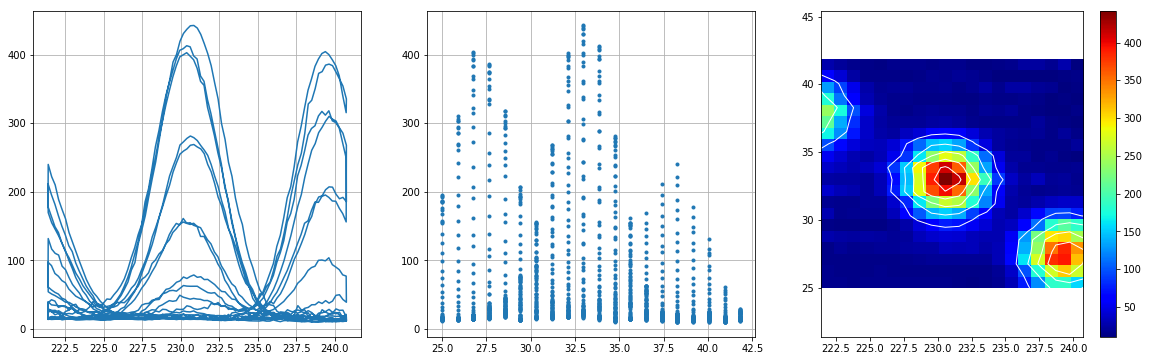

In [97]:
plt.figure(figsize=(20,6))
plt.subplot(131)
plt.plot(map_npz['az'],map_npz['pwr'])
plt.grid()
plt.subplot(132)
plt.plot(map_npz['el'],map_npz['pwr'],'.')
plt.grid()
plt.subplot(133)
PlotMap(map_npz)
plt.show()

0.0 180.0 -180.0 180.0
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 30 deg -0.00'.


/Users/jaguirre/anaconda/envs/ASTR/lib/python3.6/site-packages/healpy/projaxes.py:387: RuntimeWarning: invalid value encountered in greater
  w=np.where(d2 > threshold)[0]
/Users/jaguirre/anaconda/envs/ASTR/lib/python3.6/site-packages/healpy/projector.py:750: RuntimeWarning: invalid value encountered in greater
  mask = (np.asarray(x)**2+np.asarray(y)**2>1.0)


76.80338855418589 103.19661144581411 -13.196611445814117 13.196611445814117
The interval between parallels is 2 deg 0.00'.
The interval between meridians is 2 deg 0.00'.


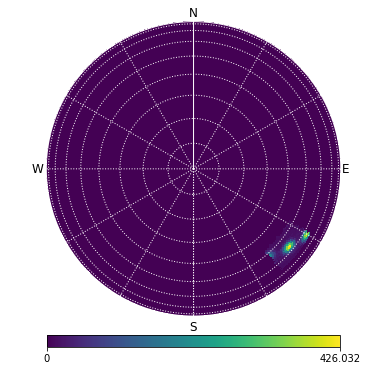

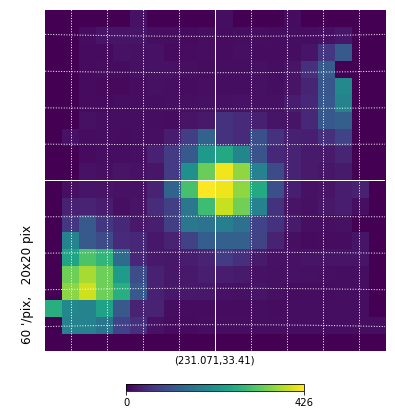

In [105]:
if map_no==8:
    name='sat'
if map_no==0:
    name='sun'
hp.orthview(mp,half_sky=True,rot=[180,90],title='',margins=[0,0,1,1],flip='geo')#,sub = (1,2,1))
hp.graticule(dpar=10,dmer=30,color='white')
plt.text(1.01,-0.03,'E',color='black',fontsize=12)
plt.text(-0.03,1.03,'N',color='black',fontsize=12)
plt.text(-1.1,-0.03,'W',color='black',fontsize=12)
plt.text(-0.03,-1.1,'S',color='black',fontsize=12)
plt.savefig('mrt_'+name+'_orth.png')
fov = 20.*u.deg
reso = 60.*u.arcmin
xsize = int((fov/reso).to(u.dimensionless_unscaled))
hp.gnomview(mp,rot=[map_npz['az'].mean(),map_npz['el'].mean()],xsize=xsize,reso=reso.to(u.arcmin).value,title='')#,sub = (1,2,2))
hp.graticule(color='white',dpar=2.,dmer=2.)
plt.savefig('mrt_'+name+'_gnom.png')

In [99]:
hp.orthview?

Signature: hp.orthview(map=None, fig=None, rot=None, coord=None, unit='', xsize=800, half_sky=False, title='Orthographic view', nest=False, min=None, max=None, flip='astro', remove_dip=False, remove_mono=False, gal_cut=0, format='%g', format2='%g', cbar=True, cmap=None, notext=False, norm=None, hold=False, margins=None, sub=None, return_projected_map=False)
Docstring:
Plot a healpix map (given as an array) in Orthographic projection.

Parameters
----------
map : float, array-like or None
  An array containing the map.
  If None, will display a blank map, useful for overplotting.
fig : int or None, optional
  The figure number to use. Default: create a new figure
rot : scalar or sequence, optional
  Describe the rotation to apply.
  In the form (lon, lat, psi) (unit: degrees) : the point at
  longitude *lon* and latitude *lat* will be at the center. An additional rotation
  of angle *psi* around this direction is applied.
coord : sequence of character, optional
  Either one of 'G', 'E' 

In [43]:
print(map_npz['pwr'].mean())
print(map_npz['pwr'].std())

11.515350690694412
0.9767444649478896


Sun: peak 26, bkgrnd 11.5, RMS 1

In [3]:
K_sun = 5800.*np.power(0.5/5.,2)
muWperK = (26.-11.5)/K_sun

In [4]:
K_sun

58.000000000000014

In [5]:
# T_rx + T_sky ... not crazy
11.5/muWperK

46.00000000000001

In [7]:
# Things that ought to be 300 K and black come in at 30 - 35 microW.  Huh.
print('Measured black things',35./muWperK)
print('Expected for 300 K',300*muWperK)

Measured black things 140.00000000000003
Expected for 300 K 74.99999999999999


In [142]:
# RMS in K, per sample.  How long is the integration?
1./muWperK

4.000000000000001

In [11]:
sqrtBWT = np.sqrt(1.e9*0.1)

In [12]:
sqrtBWT

10000.0

In [17]:
# Noise level is high.  Background level isn't crazy, assuming 20 K T_rx and 20 K sky
# Should be able to attain for something like the moon
print('Expected RMS',(46.*u.K/sqrtBWT).to(u.mK))
print('Moon brightness',K_sun*(300./5800.)*u.K)
print('Moon microW',3.*muWperK)
print('Jupiter brightness',80*u.K*np.power((30.*u.arcsec/(5.*u.deg)).to(u.dimensionless_unscaled),2))

Expected RMS 4.6 mK
Moon brightness 3.000000000000001 K
Moon microW 0.7499999999999998
Jupiter brightness 0.0002222222222222222 K


In [147]:
ls Wed_Apr_11*.npz

Wed_Apr_11_11:29:43_2018.npz  Wed_Apr_11_12:27:36_2018.npz
Wed_Apr_11_11:32:14_2018.npz  Wed_Apr_11_12:59:45_2018.npz
Wed_Apr_11_11:33:36_2018.npz  Wed_Apr_11_13:01:10_2018.npz
Wed_Apr_11_11:41:48_2018.npz  Wed_Apr_11_13:05:07_2018.npz
Wed_Apr_11_11:49:29_2018.npz  Wed_Apr_11_13:07:57_2018.npz
Wed_Apr_11_11:53:27_2018.npz  Wed_Apr_11_13:08:29_2018.npz
Wed_Apr_11_12:00:55_2018.npz  Wed_Apr_11_13:10:07_2018.npz
Wed_Apr_11_12:10:34_2018.npz  Wed_Apr_11_13:11:17_2018.npz
Wed_Apr_11_12:27:17_2018.npz


In [195]:
# This shit drives me crazy with no way to access what's in the damn thing
tmp = np.load('Wed_Apr_11_13:11:17_2018.npz',encoding='latin1')
tmp.keys()
tmp.items()[0][1]

array({'lastCMDvalid': array([b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y', b'Y',
       b'Y', b'Y', b'Y', b'Y

In [149]:
#plt.plot(skydip['el'],skydip['pwr'])

KeyError: 'el is not a file in the archive'

In [182]:
el = np.array([69.9052, 69.6802, 69.4552, 69.2302, 69.0053, 68.7803, 68.5553,
       68.3303, 68.1054, 67.8804, 67.6554, 67.4304, 67.2054, 66.9805,
       66.7555, 66.5305, 66.3055, 66.0806, 65.8556, 65.6306, 65.4056,
       65.1807, 64.9557, 64.7307, 64.5057, 64.2808, 64.0558, 63.8308,
       63.6058, 63.3809, 63.1559, 62.9309, 62.7059, 62.481 , 62.256 ,
       62.031 , 61.806 , 61.5811, 61.3561, 61.1311, 60.9061, 60.6812,
       60.4562, 60.2312, 60.0062, 59.7813, 59.5563, 59.3313, 59.1063,
       58.8814, 58.6564, 58.4314, 58.2064, 57.9814, 57.7565, 57.5315,
       57.3065, 57.0815, 56.8566, 56.6316, 56.4066, 56.1816, 55.9567,
       55.7317, 55.5067, 55.2817, 55.0568, 54.8318, 54.6068, 54.3818,
       54.1569, 53.9319, 53.7069, 53.4819, 53.257 , 53.032 , 52.807 ,
       52.582 , 52.3571, 52.1321, 51.9071, 51.6821, 51.4572, 51.2322,
       51.0072, 50.7822, 50.5573, 50.3323, 50.1073, 49.8823, 49.6574,
       49.4324, 49.2074, 48.9824, 48.7574, 48.5325, 48.3075, 48.0825,
       47.8575, 47.6326, 47.4076, 47.1826, 46.9576, 46.7327, 46.5077,
       46.2827, 46.0577, 45.8328, 45.6078, 45.3828, 45.1578, 44.9329,
       44.7079, 44.4829, 44.2579, 44.033 , 43.808 , 43.583 , 43.358 ,
       43.1331, 42.9081, 42.6831, 42.4581, 42.2332, 42.0082, 41.7832,
       41.5582, 41.3333, 41.1083, 40.8833, 40.6583, 40.4334, 40.2084,
       39.9834, 39.7584, 39.5335, 39.3085, 39.0835, 38.8585, 38.6335,
       38.4086, 38.1836, 37.9586, 37.7336, 37.5087, 37.2837, 37.0587,
       36.8337, 36.6088, 36.3838, 36.1588, 35.9338, 35.7089, 35.4839,
       35.2589, 35.0339, 34.809 , 34.584 , 34.359 , 34.134 , 33.9091,
       33.6841, 33.4591, 33.2341, 33.0092, 32.7842, 32.5592, 32.3342,
       32.1093, 31.8843, 31.6593, 31.4343, 31.2094, 30.9844, 30.7594,
       30.5344, 30.3095, 30.0845, 29.8595, 29.6345, 29.4095, 29.1846,
       28.9596, 28.7346, 28.5096, 28.2847, 28.0597, 27.8347, 27.6097,
       27.3848, 27.1598, 26.9348, 26.7098, 26.4849, 26.2599, 26.0349,
       25.8099, 25.585 , 25.36  , 25.135 , 24.91  , 24.6851, 24.4601,
       24.2351, 24.0101, 23.7852, 23.5602, 23.3352, 23.1102, 22.8853,
       22.6603, 22.4353, 22.2103, 21.9854, 21.7604, 21.5354, 21.3104,
       21.0854, 20.8605, 20.6355, 20.4105, 20.1855, 19.9606, 19.7356,
       19.5106, 19.2856, 19.0607, 18.8357, 18.6107, 18.3857, 18.1608,
       17.9358, 17.7108, 17.4858, 17.2609, 17.0359, 16.8109, 16.5859,
       16.361 , 16.136 , 15.911 , 15.686 , 15.4611, 15.2361, 15.0111,
       14.7861, 14.5612, 14.3362, 14.1112, 13.8862, 13.6613, 13.4363,
       13.2113, 12.9863, 12.7614, 12.5364, 12.3114, 12.0864, 11.8614,
       11.6365, 11.4115, 11.1865, 10.9615, 10.7366, 10.5116, 10.2866,
       10.0616,  9.8367,  9.6117,  9.3867,  9.1617,  8.9368,  8.7118,
        8.4868,  8.2618,  8.0369,  7.8119,  7.5869,  7.3619,  7.137 ,
        6.912 ,  6.687 ,  6.462 ,  6.2371,  6.0121,  5.7871,  5.5621,
        5.3372,  5.1122,  4.8872,  4.6622,  4.4373,  4.2123,  3.9873,
        3.7623,  3.5374,  3.3124,  3.0874,  2.8624,  2.6375,  2.4125,
        2.1875,  1.9625,  1.7375,  1.5126,  1.2876,  1.0626,  0.8376,
        0.6127,  0.3877])

In [196]:
pwr = np.array([11.64796347, 11.20942494, 11.11305166, 11.33922397, 11.28495938,
       11.13439609, 11.32835021, 11.20942494, 11.32835021, 11.67033528,
       11.48153621, 11.86223891, 11.63679365, 11.62563454, 11.47052599,
       11.52568289, 12.32631703, 12.16186001, 11.79415054, 11.49255701,
       11.56999932, 11.49255701, 11.72645298, 11.47052599, 11.76025305,
       11.58110502, 11.54781985, 11.35010816, 12.43321184, 12.2438124 ,
       12.04573579, 12.26732864, 12.3737119 , 12.60133818, 12.3737119 ,
       11.99959716, 11.99959716, 11.91927939, 12.38558906, 13.23325455,
       12.64979051, 12.2438124 , 12.16186001, 12.30268771, 12.06887159,
       12.55307143, 11.76025305, 12.56512076, 12.01111523, 12.80855095,
       11.88502227, 11.9078494 , 11.72645298, 12.44514612, 12.03418453,
       12.51699273, 12.25556488, 12.18521884, 12.42128901, 12.43321184,
       12.83315186, 12.16186001, 12.72281855, 12.20862254, 12.39747763,
       11.98809015, 11.72645298, 11.98809015, 11.98809015, 12.32631703,
       11.87362513, 11.60334842, 11.7039736 , 12.72281855, 11.76025305,
       11.01750695, 11.17720801, 11.19867566, 12.20862254, 12.58925412,
       12.27910369, 12.43321184, 12.26732864, 12.84547002, 12.51699273,
       11.41563305, 12.26732864, 12.44514612, 11.85086361, 12.04573579,
       11.42659058, 11.44853721, 12.6255411 , 12.73503081, 11.94217231,
       12.03418453, 13.00668632, 14.35764904, 15.57758035, 12.87014184,
       12.89486105, 12.52900743, 12.73503081, 12.77173798, 12.55307143,
       12.79626818, 12.44514612, 12.18521884, 12.39747763, 12.44514612,
       12.39747763, 12.72281855, 12.75949051, 12.68625198, 12.54103366,
       12.91962773, 13.05669723, 12.79626818, 12.87014184, 12.26732864,
       12.51699273, 12.54103366, 12.27910369, 12.23207119, 12.18521884,
       11.97659416, 13.0441765 , 12.75949051, 13.50257713, 12.52900743,
       13.24595677, 12.27910369, 11.86223891, 12.90723845, 12.61343383,
       12.09205183, 12.87014184, 12.18521884, 11.97659416, 12.20862254,
       12.57718165, 12.52900743, 12.3381487 , 12.27910369, 12.18521884,
       12.88249552, 12.79626818, 12.80855095, 12.38558906, 12.36184612,
       12.91962773, 12.56512076, 12.29089004, 12.46904905, 12.73503081,
       12.55307143, 12.45709185, 13.08177474, 12.88249552, 12.51699273,
       12.710618  , 12.93202891, 12.710618  , 12.63765999, 12.69842914,
       12.710618  , 12.58925412, 13.15729665, 13.61967256, 12.72281855,
       13.76416912, 13.5675053 , 14.00393222, 13.30965097, 12.32631703,
       12.93202891, 13.10690042, 13.6589296 , 12.98175275, 12.56512076,
       12.74725479, 12.87014184, 12.52900743, 13.05669723, 13.08177474,
       12.15019739, 12.42128901, 12.27910369, 12.09205183, 12.27910369,
       12.34999173, 12.18521884, 12.13854595, 12.26732864, 11.93072036,
       12.2438124 , 12.58925412, 12.2438124 , 12.32631703, 12.40937761,
       12.3381487 , 12.91962773, 12.34999173, 12.19691508, 12.54103366,
       12.40937761, 12.29089004, 12.74725479, 12.6255411 , 12.64979051,
       12.30268771, 12.06887159, 12.08045615, 12.30268771, 12.11527659,
       12.01111523, 12.32631703, 12.13854595, 12.64979051, 12.18521884,
       12.09205183, 12.01111523, 11.87362513, 12.46904905, 12.16186001,
       11.77154137, 11.77154137, 12.3144967 , 12.90723845, 12.48101773,
       12.74725479, 12.72281855, 12.74725479, 12.78399719, 12.8208455 ,
       12.95686698, 12.29089004, 12.60133818, 12.91962773, 12.50498956,
       12.56512076, 13.14467946, 12.90723845, 12.69842914, 13.10690042,
       13.6851638 , 13.51553786, 13.37365144, 14.13893398, 13.28413662,
       13.51553786, 13.95029313, 14.49606074, 14.55179831, 15.74284913,
       15.95572956, 15.69760271, 15.80338062, 15.54771842, 15.84893192,
       16.32738625, 16.12501027, 16.46897865, 16.93362742, 16.98243652,
       17.57923614, 18.35481451, 18.65663579, 19.47974796, 20.93308965,
       21.2977308 , 22.58135509, 23.60025343, 24.35940447, 25.2638771 ,
       26.37849417, 27.70129039, 28.42824175, 29.56877505, 29.93987618,
       31.38099189, 32.26636186, 32.48378794, 33.30427623, 33.75462856,
       34.47466066, 34.30967993, 35.21005202, 35.48133892, 35.54948662,
       35.51539643, 35.92664533, 34.94083934, 35.37936225, 36.16873614,
       36.03019949, 35.89219346, 36.30780548, 36.34265628, 35.68617493,
       35.78903595, 35.31154068, 35.54948662, 36.34265628, 36.27298809,
       35.82338881, 36.37754054, 36.51741273, 35.82338881, 35.54948662])

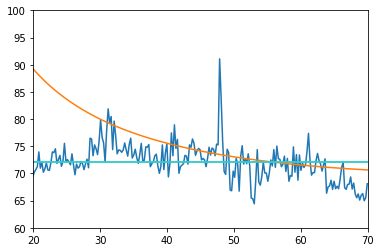

In [225]:
K_sun = 5800.*np.power(0.5/4.,2)
muWperK = (27.-11.5)/K_sun
meanK = pwr[el > 20.].mean()/muWperK
medK = np.median(pwr[el > 20.]/muWperK)
plt.plot(el,pwr/muWperK)
plt.plot(el,60.+10./np.cos(np.radians(90.-el)))
plt.axhline(meanK,color='red')
plt.axhline(medK,color='cyan')
plt.xlim([20,70])
plt.ylim([60,100])
plt.show()

In [220]:
print(pwr[el > 20.].mean()/muWperK)

72.18874007292575


In [226]:
print(medK)
print(meanK)

72.1037808639113
72.18874007292575


In [19]:
hp.smoothing?

Signature: hp.smoothing(map_in, fwhm=0.0, sigma=None, pol=True, iter=3, lmax=None, mmax=None, use_weights=False, datapath=None, verbose=True)
Docstring:
Smooth a map with a Gaussian symmetric beam.

No removal of monopole or dipole is performed.

Parameters
----------
map_in : array or sequence of 3 arrays
  Either an array representing one map, or a sequence of
  3 arrays representing 3 maps, accepts masked arrays
fwhm : float, optional
  The full width half max parameter of the Gaussian [in
  radians]. Default:0.0
sigma : float, optional
  The sigma of the Gaussian [in radians]. Override fwhm.
pol : bool, optional
  If True, assumes input maps are TQU. Output will be TQU maps.
  (input must be 1 or 3 alms)
  If False, each map is assumed to be a spin 0 map and is
  treated independently (input can be any number of alms).
  If there is only one input map, it has no effect. Default: True.
iter : int, scalar, optional
  Number of iteration (default: 3)
lmax : int, scalar, optional
  Max